In [122]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [123]:
## obtenir dataframe à partir du csv
def getOriginalDf(pPath = './utils/lending_club_loans.csv'):
    return pd.read_csv(pPath)

In [124]:
df_loan = getOriginalDf()
df_loan.describe(include='all')

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,application_type,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
count,3.978600e+04,3.978600e+04,39786.000000,39786.000000,39786.000000,39786,39786,39786.000000,39786,39786,...,39786.000000,39715,39786.000000,39784,39730.0,39786,39730.0,39786.0,39089.000000,39747.0
unique,NaN,NaN,NaN,NaN,NaN,2,371,NaN,7,35,...,NaN,109,NaN,114,NaN,1,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,36 months,10.99%,NaN,B,B3,...,NaN,Mar-13,NaN,Jan-17,NaN,INDIVIDUAL,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,29096,958,NaN,12035,2924,...,NaN,1026,NaN,10469,NaN,39786,NaN,NaN,NaN,NaN
mean,6.833939e+05,8.507937e+05,11231.360277,10958.722289,10409.018679,NaN,NaN,324.733637,NaN,NaN,...,12.625390,NaN,2679.092793,NaN,0.0,NaN,0.0,0.0,0.043286,0.0
std,2.106770e+05,2.656370e+05,7464.542832,7194.076908,7135.760122,NaN,NaN,208.923212,NaN,NaN,...,149.855504,NaN,4443.383020,NaN,0.0,NaN,0.0,0.0,0.204381,0.0
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,NaN,NaN,15.690000,NaN,NaN,...,0.000000,NaN,0.000000,NaN,0.0,NaN,0.0,0.0,0.000000,0.0
25%,5.163518e+05,6.670548e+05,5500.000000,5400.000000,5000.000000,NaN,NaN,167.080000,NaN,NaN,...,0.000000,NaN,218.072500,NaN,0.0,NaN,0.0,0.0,0.000000,0.0
50%,6.662295e+05,8.515440e+05,10000.000000,9650.000000,8975.000000,NaN,NaN,280.610000,NaN,NaN,...,0.000000,NaN,549.425000,NaN,0.0,NaN,0.0,0.0,0.000000,0.0
75%,8.378710e+05,1.047528e+06,15000.000000,15000.000000,14400.000000,NaN,NaN,430.780000,NaN,NaN,...,0.000000,NaN,3292.122500,NaN,0.0,NaN,0.0,0.0,0.000000,0.0


/*******************/

Quel est le format des données?


---> 
La commande df_loan.info()
donne le format des données ainsi que d'autres infos informations


/********************/

In [125]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39786 entries, 0 to 39785
Data columns (total 47 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39786 non-null  int64  
 1   member_id                   39786 non-null  int64  
 2   loan_amnt                   39786 non-null  int64  
 3   funded_amnt                 39786 non-null  int64  
 4   funded_amnt_inv             39786 non-null  float64
 5   term                        39786 non-null  object 
 6   int_rate                    39786 non-null  object 
 7   installment                 39786 non-null  float64
 8   grade                       39786 non-null  object 
 9   sub_grade                   39786 non-null  object 
 10  emp_length                  38708 non-null  object 
 11  home_ownership              39786 non-null  object 
 12  annual_inc                  39786 non-null  float64
 13  verification_status         397

/*****************************/

Combien d'enregistrements (lignes) ont été fournis?


--->

On voit avec la commande df_loan.shape (ci-bas) qu'il s'agit de 39786 enregistrements


/*****************************/

In [126]:
df_loan.shape

(39786, 47)

/*****************************/

Quelles sont les descripteurs (colonnes) du dataset?


---> 
Les descripteurs seraient toutes les variables, sauf la variable dépendante.
La variable dépendante (Y) est 'loan_status'


On verra avec la commande: 


df_loan.columns


/*****************************/

In [127]:
df_loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'application_type',
       'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies',
       'tax_liens'],
      dtype='object')

In [128]:
### count null dans les colonnes
col_name = ['col_name', 'cnt_null']
#df_cols = pd.DataFrame( df_loan.isnull().sum(), columns = col_name)
df_cols = pd.DataFrame( df_loan.isnull().sum())
df_cols


,0
id,0
member_id,0
loan_amnt,0
funded_amnt,0
funded_amnt_inv,0
term,0
int_rate,0
installment,0
grade,0
sub_grade,0


/*********************/


Y a-t-il des valeurs manquantes?


Dans la cellule ci-bas on examine les valeurs manquantes


/***********************/

In [129]:
### % null dans chaque colonne
#df_cols[df_cols[0]>0] /len (df_loan)
pct_nulls = 100 * (df_cols[df_cols[0]>0] /len (df_loan))
pct_cols_ayant_null = 100*(len(df_cols[df_cols[0]>0])/(len(df_loan.columns)))

print("% de cols ayant null: ", pct_cols_ayant_null)
print ("% de null dans les colonnes ayant null: ", pct_nulls)

% de cols ayant null:  17.02127659574468
% de null dans les colonnes ayant null:                                     0
emp_length                  2.709496
revol_util                  0.125672
last_pymnt_d                0.178455
last_credit_pull_d          0.005027
collections_12_mths_ex_med  0.140753
chargeoff_within_12_mths    0.140753
pub_rec_bankruptcies        1.751873
tax_liens                   0.098024


/***************/


Y-a-t-il des valeurs manquantes?


--->
Variables manquantes, on a obtenu: 
- environ 17% de colonnes ayant de valeurs null
- dans les colonnes ayant null, celle qui contient le plus est 'emp_length' avec 2.7%


/*******************/

In [130]:
### on supprime les colonnes id car elles ne devraient pas influencer le résultat du prêt
cols_drop = ['id', 'member_id']
df_loan.drop(cols_drop, axis=1, inplace=True)

/*************/


À quoi semblent les variables non-numériques?


Voyons-les:


/*************/

In [131]:
## df_obj = dataframe avec col type obj
df_obj = df_loan.select_dtypes('object')
df_obj.head()

,term,int_rate,grade,sub_grade,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,zip_code,addr_state,earliest_cr_line,revol_util,initial_list_status,last_pymnt_d,last_credit_pull_d,application_type
0,36 months,10.65%,B,B2,10+ years,RENT,Verified,Dec-11,Fully Paid,n,860xx,AZ,Jan-85,83.70%,f,Jan-15,Jan-17,INDIVIDUAL
1,60 months,15.27%,C,C4,< 1 year,RENT,Source Verified,Dec-11,Charged Off,n,309xx,GA,Apr-99,9.40%,f,Apr-13,Oct-16,INDIVIDUAL
2,36 months,15.96%,C,C5,10+ years,RENT,Not Verified,Dec-11,Fully Paid,n,606xx,IL,Nov-01,98.50%,f,Jun-14,Jan-17,INDIVIDUAL
3,36 months,13.49%,C,C1,10+ years,RENT,Source Verified,Dec-11,Fully Paid,n,917xx,CA,Feb-96,21%,f,Jan-15,Apr-16,INDIVIDUAL
4,60 months,12.69%,B,B5,1 year,RENT,Source Verified,Dec-11,Fully Paid,n,972xx,OR,Jan-96,53.90%,f,Jan-17,Jan-17,INDIVIDUAL


In [132]:
## Par exemple, quelle est le type date 'issue_d' ?
print(type(df_obj['issue_d'][0]))
print(type(df_obj['earliest_cr_line'][0]))

<class 'str'>
<class 'str'>


/*******************/


Quel est le format des données? Par exemple, dans quel format les dates sont fournies? 
Existent-t-il des valeurs numériques?
À quoi ressemblent les différentes valeur catéforiques?


---> Les variables date sont des strings

---> Il y a des valeurs qui pourraient être numériques, comme 'int_rate' et 'revol_util' qui ont été codées
comme string avec '%'

---> Plusieurs type de valeurs catégoriques, comme par exemple 'grade', 'sub_grade', 'loan_status'


/********************/

In [133]:
## valeurs unique dans chaque colonne
df_obj.nunique()

term                      2
int_rate                371
grade                     7
sub_grade                35
emp_length               11
home_ownership            5
verification_status       3
issue_d                  55
loan_status               7
pymnt_plan                1
zip_code                823
addr_state               50
earliest_cr_line        526
revol_util             1089
initial_list_status       1
last_pymnt_d            109
last_credit_pull_d      114
application_type          1
dtype: int64

/************/

D'autres observations sur le dataset


---> Il y a des colonnes ayant une seule valeur distincte:
- pymnt_plan
- initial_list_status
- application_type


Ces variables n'ont pas d'utilité dans un modèle de regression.

/************/

In [134]:
### Requêtes pour confirmer si le valeurs sont unique ou s'il s'agit d'une valeur plus null
# df_obj['application_type'].isnull().sum()
df_obj['pymnt_plan'].isnull().sum()

0

---> Il s'agit vraiment d'une seule valeur (sum = 0). 
Donc les colonnes ayant une seule valeur sont inutiles pour la regression/classification

/************/

Ci-après, création d'un tableau seulement avec des variables numériques et tableau de correlation
pour répondre à la question:


Est-ce qu'il y a des dépendances évidentes au niveau de descripteurs?


/*************/

In [135]:
## df numérique
df_num = df_loan.select_dtypes(exclude='object')

<AxesSubplot: >

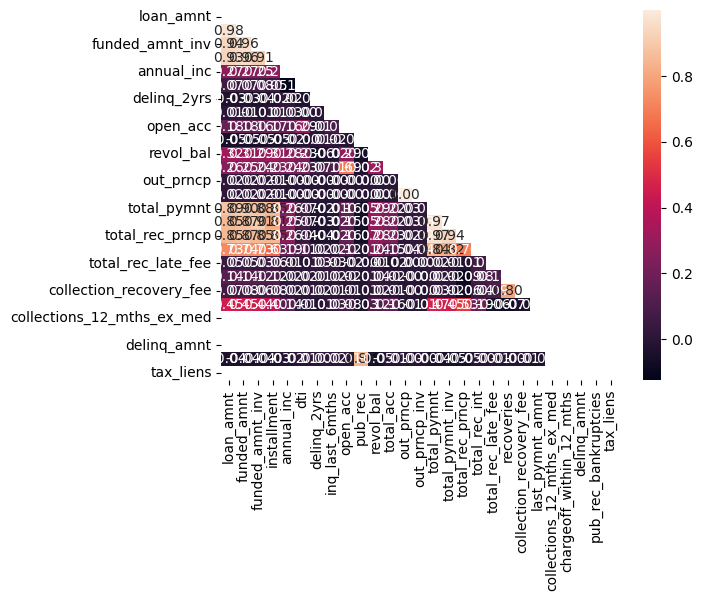

In [136]:
corr = df_num.corr()
matrix = np.triu(corr)
sns.heatmap(corr, annot=True, fmt=".2f", mask=matrix)

In [137]:
#### On ne peut pas voir grandes choses avec la visualisation ci-haut
## Voyons le tableau de correlation
corr

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
loan_amnt,1.000000,0.981544,0.940157,0.930209,0.271340,0.067136,-0.031484,0.009442,0.177216,-0.051075,...,0.729182,0.048918,0.135793,0.073813,0.448646,NaN,NaN,NaN,-0.037105,NaN
funded_amnt,0.981544,1.000000,0.958564,0.956108,0.267130,0.067035,-0.031948,0.009383,0.175515,-0.051956,...,0.736803,0.051040,0.136719,0.075694,0.453140,NaN,NaN,NaN,-0.038381,NaN
funded_amnt_inv,0.940157,0.958564,1.000000,0.905098,0.254545,0.075448,-0.038064,-0.005552,0.163031,-0.052957,...,0.730512,0.031926,0.124469,0.061631,0.442638,NaN,NaN,NaN,-0.042596,NaN
installment,0.930209,0.956108,0.905098,1.000000,0.271119,0.054730,-0.019309,0.009894,0.172885,-0.046438,...,0.633488,0.059478,0.118458,0.076150,0.401955,NaN,NaN,NaN,-0.034029,NaN
annual_inc,0.271340,0.267130,0.254545,0.271119,1.000000,-0.122537,0.022985,0.034226,0.158178,-0.018611,...,0.185172,0.006819,0.021827,0.015889,0.140589,NaN,NaN,NaN,-0.016809,NaN
dti,0.067136,0.067035,0.075448,0.054730,-0.122537,1.000000,-0.034562,0.001452,0.288087,-0.004573,...,0.106688,-0.010138,0.024738,0.011035,0.005332,NaN,NaN,NaN,0.005737,NaN
delinq_2yrs,-0.031484,-0.031948,-0.038064,-0.019309,0.022985,-0.034562,1.000000,0.007854,0.011822,0.007205,...,0.023506,0.032490,0.014231,0.015500,-0.012110,NaN,NaN,NaN,0.003209,NaN
inq_last_6mths,0.009442,0.009383,-0.005552,0.009894,0.034226,0.001452,0.007854,1.000000,0.091554,0.024937,...,0.021614,0.029126,0.019230,0.012618,0.028523,NaN,NaN,NaN,0.016173,NaN
open_acc,0.177216,0.175515,0.163031,0.172885,0.158178,0.288087,0.011822,0.091554,1.000000,-0.000098,...,0.123848,-0.017265,0.015589,0.005580,0.079065,NaN,NaN,NaN,0.005789,NaN
pub_rec,-0.051075,-0.051956,-0.052957,-0.046438,-0.018611,-0.004573,0.007205,0.024937,-0.000098,1.000000,...,-0.007002,-0.002965,-0.005642,-0.005664,-0.032375,NaN,NaN,NaN,0.845864,NaN


/*******************/

Est-ce qu'il y a des dépendances évidentes au niveau de descripteurs?


---> oui.


On voit qu'il y a des variables fortement correlées, comme par exemple:
- funded_amnt x loan_amnt
- funded_amnt_inv x loan_amnt


/*******************/

/*******************************************/
Étape 2: Nettoyage

Dans cette étape, on s’intéresse à implémenter les correctifs soulignés dans l’étape 1.
De ce fait, il serait important de considérer les opérations suivantes :

- Imputing: évaluer les colonnes avec des valeurs manquantes. Par exemple, voir les
colonnes:

- title, revol_util et pub_rec_bankruptcies

Une stratégie à employer:
Supprimer la colonne ayant plus de 1 à 2% de valeurs manquantes
Supprimer les lignes ayant des valeurs NaN
- Convertir les colonnes catégorielles en numériques. Faire attention ici aux valeurs
ordinales et nominales (dummy var).
- Suppression de colonnes non adéquates pour la prédiction
- Suppression des colonnes qui ne seront intéressantes que pour prédire le statut de
paiement du prêt. Les colonnes dont les valeurs seront obtenues après le prêt ne
doivent pas être considérées. Par exemple, évaluer si les colonnes suivantes sont à
supprimer:
- zip_code
- out_prncp 
- out_prncp_inv
- total_pymnt
- total_pymnt_inv
- total_rec_prncp
- total_rec_int
- total_rec_late_fee

/********************************************/

In [138]:
#lstCols = ['title', 'revol_util', 'pub_rec_bankruptcies']
lstCols = [ 'revol_util', 'pub_rec_bankruptcies']
dfNettoyage =  df_loan[lstCols]

In [139]:
dfNettoyage.head()

,revol_util,pub_rec_bankruptcies
0,83.70%,0.0
1,9.40%,0.0
2,98.50%,0.0
3,21%,0.0
4,53.90%,0.0


/*****************/

On a vu précédements les colonnes ayant des null et le % de nulls:

% de cols ayant null:  17.02127659574468

% de null dans les colonnes ayant null: 0

- emp_length                  2.709496
- revol_util                  0.125672
- last_pymnt_d                0.178455
- last_credit_pull_d          0.005027
- collections_12_mths_ex_med  0.140753
- chargeoff_within_12_mths    0.140753
- pub_rec_bankruptcies        1.751873
- tax_liens                   0.098024




Selon les directives de l'excercice, les seules colonnes à supprimer seraient:
- pub_rec_bankruptcies 
- emp_length
, les deux ayant plus que 1% de null


/*****************/

In [140]:
## drop colonnes
lst_cols_drop = ['pub_rec_bankruptcies', 'emp_length']
df_loan2 = df_loan.drop(lst_cols_drop, axis=1)

In [141]:
df_loan2.shape

(39786, 43)

In [142]:
## combien de lignes ayant null
df_loan2.isnull().sum(axis=1).astype(bool).sum()

175

In [143]:
## si on les supprime, on ne perd pas grandes choses (seulement 175 rows)
df_loan2.dropna(inplace=True)

In [144]:
df_loan2.shape

(39611, 43)

In [145]:
## On suit les même conseils de https://www.dataquest.io/blog/machine-learning-preparing-data/
## on va simplifier la colonne cible 'loan_status'  et la mettre dans un format adéquat pour le modèle 
'''
We're interested in being able to predict which of 'Fully Paid' or 'Charged Off' 
a loan will fall under, so we can treat the problem as binary classification. 
Let's remove all the loans that don't contain either 'Fully Paid' or 'Charged Off' as the loan's status 
and then transform the 'Fully Paid' values to 1 for the positive case and the 'Charged Off' 
values to 0 for the negative case.

This will mean that out of the ~42,000 rows we have, we'll be removing just over 3,000.
'''


df_loan2 = df_loan2[(df_loan2["loan_status"] == "Fully Paid") |
(df_loan2["loan_status"] == "Charged Off")]
mapping_dictionary = {"loan_status":{ "Fully Paid": 1, "Charged Off": 0}}
df_loan2 = df_loan2.replace(mapping_dictionary)
df_loan2.shape

(39595, 43)

/****************/

Exclusion des colonnes non-pertinentes pour l'analyse:

https://data.world/jaypeedevlin/lending-club-loan-data-2007-11

https://www.dataquest.io/blog/machine-learning-preparing-data/

Dans le site on trouve la liste de colonnes à exclure. Certaines de ces colonnes on a déjà exclues.
À exclure:
- id
- member_id
- funded_amnt
- funded_amnt_inv
- sub_grade
- int_rate
- emp_title
- issued_d
- zip_code
- out_prncp
- out_prncp_in
- total_pymnt
- total_pymnt_inv
- total_rec_prncp
- total_rec_int
- total_rec_late_fee
- recoveries
- collection_recovery_fee
- last_pymnt_d
- last_pymnt_amnt


On va supprimer ces colonnes

/*****************/

In [146]:
## fonction pour obtenir un df sans les colonnes à exclure
def getDfExcludeCols(pDfOrig, pColsExclusion):
    return pDfOrig.drop(pColsExclusion, axis=1)

In [147]:
### suppression des colonnes non pertinentes pour l'analyse
cols_sup=[
    #'id', 'member_id', 
     'funded_amnt', 'funded_amnt_inv', 'sub_grade', 'int_rate'
   # , 'emp_title'
   , 'issue_d'
    , 'zip_code', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp'
, 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d'
, 'last_pymnt_amnt'
]

In [148]:
df_loan3 = getDfExcludeCols(df_loan2, cols_sup)

In [149]:
df_loan3.shape

(39595, 26)

In [150]:
df_loan3.isnull().sum()

loan_amnt                     0
term                          0
installment                   0
grade                         0
home_ownership                0
annual_inc                    0
verification_status           0
loan_status                   0
pymnt_plan                    0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_list_status           0
last_credit_pull_d            0
collections_12_mths_ex_med    0
application_type              0
chargeoff_within_12_mths      0
delinq_amnt                   0
tax_liens                     0
dtype: int64

/***************/

À ce point nous avons:
- supprimé les colonnes ayant plus que 1%, 2% de nulls
- supprimé les colonnes non-pertientens à l'analyse
- supprimé les lignes contenant au moins un nulls
- simplifié la colonne loan_status 

Il nous rester vérifier les variables non-numériques

/***************/

In [151]:
df_obj = df_loan3.select_dtypes(include='object')
df_obj

,term,grade,home_ownership,verification_status,pymnt_plan,addr_state,earliest_cr_line,revol_util,initial_list_status,last_credit_pull_d,application_type
0,36 months,B,RENT,Verified,n,AZ,Jan-85,83.70%,f,Jan-17,INDIVIDUAL
1,60 months,C,RENT,Source Verified,n,GA,Apr-99,9.40%,f,Oct-16,INDIVIDUAL
2,36 months,C,RENT,Not Verified,n,IL,Nov-01,98.50%,f,Jan-17,INDIVIDUAL
3,36 months,C,RENT,Source Verified,n,CA,Feb-96,21%,f,Apr-16,INDIVIDUAL
4,60 months,B,RENT,Source Verified,n,OR,Jan-96,53.90%,f,Jan-17,INDIVIDUAL
...,...,...,...,...,...,...,...,...,...,...,...
39730,36 months,A,OWN,Not Verified,n,WA,Sep-84,0.70%,f,Aug-07,INDIVIDUAL
39731,36 months,A,OWN,Not Verified,n,WA,Sep-84,1%,f,Aug-07,INDIVIDUAL
39732,36 months,C,RENT,Not Verified,n,VA,Aug-01,79.60%,f,Jun-11,INDIVIDUAL
39733,36 months,B,RENT,Not Verified,n,NY,Aug-00,19.80%,f,Aug-10,INDIVIDUAL


In [152]:
## Comme on peut voir, ce sont encore plusieurs colonnes non-numériques. Certaines sont de dates
df_obj.nunique()

term                      2
grade                     7
home_ownership            5
verification_status       3
pymnt_plan                1
addr_state               50
earliest_cr_line        526
revol_util             1089
initial_list_status       1
last_credit_pull_d      111
application_type          1
dtype: int64

In [153]:
## par le résultat ci-haut, on voit que l'ont peut supprimer encore certaines colonnes.
## Ce sont des colonnes ayant une seule valeur distincte, elle ne contribuent en rien pour l'analyse

## En plus, suivant https://www.dataquest.io/blog/machine-learning-preparing-data/,
## on va supprimer les colonnes earliest_cr_line et last_credit_pull_d
cols_sup=['application_type', 'initial_list_status', 'pymnt_plan', 'earliest_cr_line', 'last_credit_pull_d']

df_loan3 = getDfExcludeCols(df_loan3, cols_sup)

df_loan3.shape

(39595, 21)

In [154]:
df_obj = df_loan3.select_dtypes(include='object')
df_obj.nunique()

term                      2
grade                     7
home_ownership            5
verification_status       3
addr_state               50
revol_util             1089
dtype: int64

In [155]:
#df_obj['home_ownership']
df_obj['home_ownership'].value_counts()
#df_obj.groupby(by=['home_ownership']).sum()

RENT        18809
MORTGAGE    17642
OWN          3047
OTHER          96
NONE            1
Name: home_ownership, dtype: int64

/***********/

On vient de detecter un null deguisé en string 'NONE'

Comme il s'agit d'une seule valeur, on va supprimer la ligne

/*****************/


In [156]:
df_loan3[df_loan3['home_ownership']=='NONE'] = None
df_loan3.dropna(inplace=True)
df_loan3.shape

(39594, 21)

/******************/

À ce point nous avons un dataset plus propre.

Il nous manque traiter les variables non-numériques


/*******************/

In [157]:
### Regardons les colonnes:

#df_loan3['revol_util'] #--> numérique, enlever %
#df_loan3['term'] #--> catégorique 36, 60 (ordinal)
#df_loan3['grade'] #--> catégorique (ordinal)
#df_loan3['home_ownership'] #--> catégorique
#df_loan3['verification_status'] #--> catégorique
#df_loan3['addr_state'] #--> US states


In [158]:
## col revol_util
df_loan3['revol_util'] = df_loan3['revol_util'].str.rstrip('%').astype('float')
#df_loan3['revol_util'].replace(to_replace='%', value='')

In [159]:
df_loan3['revol_util']
#df_loan3['last_credit_pull_d']

0        83.7
1         9.4
2        98.5
3        21.0
4        53.9
         ... 
39730     0.7
39731     1.0
39732    79.6
39733    19.8
39734    11.0
Name: revol_util, Length: 39594, dtype: float64

In [160]:
df_loan3['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [161]:
## Transformation variables ordinaires term, grade
map_ord = {
#'term' :
#{
#' 36 months':1
#,' 60 months':2 
#},
'grade':
{
   "A": 1,
"B": 2,
"C": 3,
"D": 4,
"E": 5,
"F": 6,
"G": 7 
}
}

df_loan4 = df_loan3.replace(map_ord)
df_loan4.head()


,loan_amnt,term,installment,grade,home_ownership,annual_inc,verification_status,loan_status,addr_state,dti,...,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,collections_12_mths_ex_med,chargeoff_within_12_mths,delinq_amnt,tax_liens
0,5000.0,36 months,162.87,2,RENT,24000.0,Verified,1.0,AZ,27.65,...,1.0,3.0,0.0,13648.0,83.7,9.0,0.0,0.0,0.0,0.0
1,2500.0,60 months,59.83,3,RENT,30000.0,Source Verified,0.0,GA,1.00,...,5.0,3.0,0.0,1687.0,9.4,4.0,0.0,0.0,0.0,0.0
2,2400.0,36 months,84.33,3,RENT,12252.0,Not Verified,1.0,IL,8.72,...,2.0,2.0,0.0,2956.0,98.5,10.0,0.0,0.0,0.0,0.0
3,10000.0,36 months,339.31,3,RENT,49200.0,Source Verified,1.0,CA,20.00,...,1.0,10.0,0.0,5598.0,21.0,37.0,0.0,0.0,0.0,0.0
4,3000.0,60 months,67.79,2,RENT,80000.0,Source Verified,1.0,OR,17.94,...,0.0,15.0,0.0,27783.0,53.9,38.0,0.0,0.0,0.0,0.0


In [162]:
df_loan4.shape

(39594, 21)

In [163]:
print(df_loan4.columns)

Index(['loan_amnt', 'term', 'installment', 'grade', 'home_ownership',
       'annual_inc', 'verification_status', 'loan_status', 'addr_state', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'collections_12_mths_ex_med',
       'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens'],
      dtype='object')


In [164]:
## Transformation d'autres variables catégoriques
# df_loan3['home_ownership'] #--> catégorique
# df_loan3['verification_status'] #--> catégorique
# df_loan3['addr_state'] #--> US states
# df_loan3['loan_status'] #--> categorical
nominal_cols = ['home_ownership', 'verification_status', 'addr_state', 'term'] 

In [165]:
newDf=None
newDf = pd.get_dummies(data=df_loan4, prefix = nominal_cols, columns=nominal_cols, drop_first=True)
print(newDf.columns)

Index(['loan_amnt', 'installment', 'grade', 'annual_inc', 'loan_status', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'collections_12_mths_ex_med',
       'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens',
       'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT',
       'verification_status_Source Verified', 'verification_status_Verified',
       'addr_state_AL', 'addr_state_AR', 'addr_state_AZ', 'addr_state_CA',
       'addr_state_CO', 'addr_state_CT', 'addr_state_DC', 'addr_state_DE',
       'addr_state_FL', 'addr_state_GA', 'addr_state_HI', 'addr_state_IA',
       'addr_state_ID', 'addr_state_IL', 'addr_state_IN', 'addr_state_KS',
       'addr_state_KY', 'addr_state_LA', 'addr_state_MA', 'addr_state_MD',
       'addr_state_ME', 'addr_state_MI', 'addr_state_MN', 'addr_state_MO',
       'addr_state_MS', 'addr_state_MT', 'addr_state_NC', 'addr_state_NE',
       'addr_state_NH', 'addr_state_NJ

In [166]:
df_loan4=newDf.select_dtypes(exclude='object')

In [167]:
df_loan4.dtypes

loan_amnt          float64
installment        float64
grade                int64
annual_inc         float64
loan_status        float64
                    ...   
addr_state_WA        uint8
addr_state_WI        uint8
addr_state_WV        uint8
addr_state_WY        uint8
term_ 60 months      uint8
Length: 72, dtype: object

/****************/

À ce point nous avons un dataframe ayant seulement de variables numériques.

Ce qui nous reste à faire pour ce travail est la standardisation des données

On va séparer le dataframe en var dépendante (Y, 'loan_status') et variables indépendantes (X, tout le reste)

Ensuite on applique les transformations

/****************/

In [168]:
## fonction pour séparer les variables dépendantes et indépendantes
def getDfXDfY(pDf=df_loan, pColY='loan_status'):
    dfY = pd.DataFrame( pDf[pColY], columns = [pColY])
    dfX = pDf.drop([pColY], axis=1)
    return dfX, dfY

In [169]:
dfX, dfY = getDfXDfY(df_loan4)

In [170]:
dfY.value_counts()

loan_status
1.0            34022
0.0             5572
dtype: int64

/***************/

Le résultat du dataset est débalancé (il y a beaucoup de 1 q de 0).

Alors, si on fait une classification, le F1 serait un bon candidat de score

/****************/

In [171]:
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
#from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.metrics import  roc_curve, roc_auc_score
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import auc
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

In [172]:
## fonction pour obtenir un df mis à l'échelle
def getScaledDf(pDfX, pScaler = StandardScaler()):
    return pScaler.fit_transform(pDfX)

In [173]:
### retourne les dataframes X et Y: train, validation et test 
### (donc, 6 dataframes de retour). 
def get_train_val_test(pDfX, pDfY,  pTestSize=0.2, pPrintDebug=False):
    
    
    ### test
    X_train_0, X_test, y_train_0, y_test = train_test_split(pDfX
                                                            , pDfY
                                                            , test_size=pTestSize
                                                            , shuffle=True
                                                            , random_state=0
                                                            , stratify=pDfY
                                                           )
    #print("len y_train_0: ", len(y_train_0))
    #print("sum y_train_0: ", y_train_0.sum())
    
    
    
    ## train, val
    X_train, X_val, y_train, y_val = train_test_split(X_train_0
                                                      , y_train_0
                                                      , train_size=0.5
                                                      , shuffle=True
                                                      , random_state=0
                                                      , stratify=y_train_0
                                                     )
    
    if(pPrintDebug):
        print("------get_train_val_test------")
        print("len(pDfY): ", len(pDfY))
        print("sum pDfY: ", pDfY.sum())
        print("len y_test: ", len(y_test))
        print("sum y_test: ", y_test.sum())
        print("len y_train: ", len(y_train))
        print("len y_val: ", len(y_val))    
        print("sum y_train: ", y_train.sum())
        print("sum y_val: ", y_val.sum())
    
    return X_train, X_val, X_test, y_train, y_val, y_test

In [174]:
### logistic

### !!! C'est ici que l'on applique la standardisation (getScaledDf)
##################
## Obtention des df train, val, test
X_train, X_val, X_test, y_train, y_val, y_test = get_train_val_test(
    getScaledDf(dfX)
    , dfY)

trainX = X_train
testX = X_val
trainy = y_train.values.ravel()
testy = y_val.values.ravel()
##############


/************/

À ce point, nous avons fait toutes les étapes du travail, y compris la standardisation (fonction getScaledDf)

On va plus loin et on va appliquer un modèle de classification. Les céllules qui suivent vont 
au-delà de ce qui a été demandé. C'est un exercice qui sert à donner une idée de comment
une regression logistique marcherait avec notre dataframe preparé.

/************/

In [175]:
## Fonction pour calculer le score et afficher l'aire sous la courbe
def do_classification(pTrainX, pTestX, pTrainY, pTestY):    
    # fit a model
    model = LogisticRegression(solver='lbfgs')
    model.fit(pTrainX, pTrainY)
    # predict probabilities
    lr_probs = model.predict_proba(pTestX)
    # keep probabilities for the positive outcome only
    lr_probs = lr_probs[:, 1]
    # predict class values
    yhat = model.predict(pTestX)
    lr_precision, lr_recall, _ = precision_recall_curve(pTestY, lr_probs)
    lr_f1 = f1_score(pTestY, yhat)
    lr_auc = auc(lr_recall, lr_precision)

    # summarize scores
    print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
    # plot the precision-recall curves
    #no_skill = len(testy[testy==1]) / len(testy)
    no_skill = pTestY.sum()/ len(pTestY)
    plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
    plt.plot(lr_recall, lr_precision, marker='.', label='Logistic')
    # axis labels
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    # show the legend
    plt.legend()
    # show the plot
    plt.show()

/home/hadoop/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Logistic: f1=0.924 auc=0.921


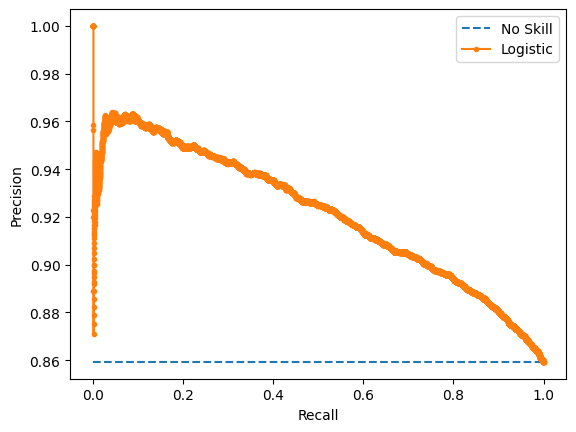

In [176]:
### Classification avec les dataframe d'entraîenemnt et validation
do_classification(X_train, X_val, y_train, y_val)


/home/hadoop/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Logistic: f1=0.924 auc=0.923


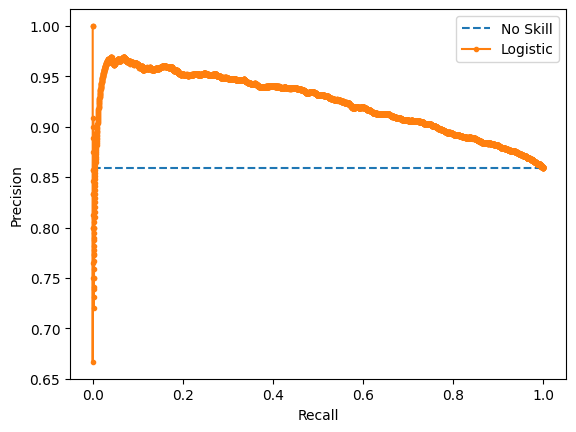

In [177]:
### Classification avec les dataframe d'entraîenemnt et TEST
do_classification(X_train, X_test, y_train, y_test)


In [178]:
from sklearn.decomposition import PCA


[9.35310531e-01 5.39230949e-02 1.07648301e-02 1.34019196e-06]


/home/hadoop/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Logistic: f1=0.925 auc=0.896


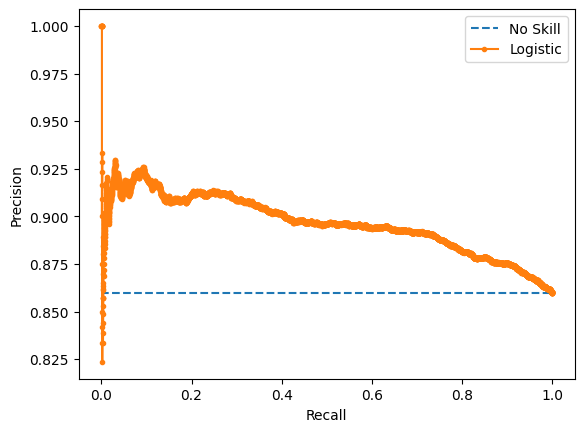

In [182]:
## PCA

pca = PCA(n_components=4)
pcaX_train, pcaX_test, pcaY_train, pcaY_test = train_test_split(pca.fit_transform(dfX), dfY
, test_size=0.2
, shuffle=True
, random_state= 0
)
print(pca.explained_variance_ratio_)


do_classification(pcaX_train, pcaX_test, pcaY_train, pcaY_test)


/**************************/
** Conclusion **

Avec le dataset que l'on a préparé au long de l'exercice, on obtient un score f1 et une aire sous la courbe
très bonnes:

f1=0.924 auc=0.923

/**************************/